<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/BIG_DATA_AI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The topic in this project is about anime acclaim. We want to know whether the sales drop since COVID-19 have been affecting the anime ratings and the number of audience.

# Explore and Clean Data

In [544]:
# Update version for Time Series analysis
!pip install statsmodels --upgrade

In [545]:
# Do not show warnings
import warnings
warnings.filterwarnings("ignore")

In [546]:
# Import scraped data. The scraping is done with Web Scraper as a Google Chrome extension. The process took 9 hours.
import pandas as pd
df = pd.read_csv("project_mal.csv")
df_clean = df.copy()

## General Info

In [547]:
# Data sample
df.head()

,web-scraper-order,web-scraper-start-url,season,season-href,anime,anime-href,name,score,rank,popularity,members,season_repeat,type,studio
0,1648530274-1492,https://myanimelist.net/anime/season/archive,Spring 2004,https://myanimelist.net/anime/season/2004/spring,Morizo to Kikkoro,https://myanimelist.net/anime/12613/Morizo_to_...,Morizo to Kikkoro,NaN,#12665,#16458,205,Spring 2004,TV,NaN
1,1648528165-1160,https://myanimelist.net/anime/season/archive,Fall 2001,https://myanimelist.net/anime/season/2001/fall,Hikaru no Go,https://myanimelist.net/anime/135/Hikaru_no_Go,Hikaru no Go,8.08,#461,#1442,"123,926",Fall 2001,TV,Studio Pierrot
2,1648547113-4194,https://myanimelist.net/anime/season/archive,Spring 2018,https://myanimelist.net/anime/season/2018/spring,Caligula (TV),https://myanimelist.net/anime/36828/Caligula_TV,Caligula (TV),6.01,#8722,#2105,"71,817",Spring 2018,TV,Satelight
3,1648535227-2280,https://myanimelist.net/anime/season/archive,Spring 2009,https://myanimelist.net/anime/season/2009/spring,Shin Mazinger Shougeki! Z-hen,https://myanimelist.net/anime/5485/Shin_Mazing...,Shin Mazinger Shougeki! Z-hen,7.67,#1165,#4785,"14,062",Spring 2009,TV,Bee Media
4,1648535899-2387,https://myanimelist.net/anime/season/archive,Summer 2010,https://myanimelist.net/anime/season/2010/summer,Digimon Xros Wars,https://myanimelist.net/anime/8624/Digimon_Xro...,Digimon Xros Wars,6.68,#5296,#2765,"44,255",Summer 2010,TV,Toei Animation


In [548]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      5026 non-null   object 
 1   web-scraper-start-url  5026 non-null   object 
 2   season                 5026 non-null   object 
 3   season-href            5026 non-null   object 
 4   anime                  5026 non-null   object 
 5   anime-href             5026 non-null   object 
 6   name                   5026 non-null   object 
 7   score                  4080 non-null   float64
 8   rank                   4939 non-null   object 
 9   popularity             5026 non-null   object 
 10  members                5026 non-null   object 
 11  season_repeat          5026 non-null   object 
 12  type                   5026 non-null   object 
 13  studio                 4340 non-null   object 
dtypes: float64(1), object(13)
memory usage: 549.8+ KB


## Score

In [549]:
# Show anime with highest rating on MyAnimeList
score_rank = df[["anime", "score"]].sort_values(["score"], ascending=False)
score_rank.head(20)

,anime,score
2874,Fullmetal Alchemist: Brotherhood,9.15
3121,Steins;Gate,9.09
4255,Gintama?,9.09
3955,Shingeki no Kyojin Season 3 Part 2,9.08
1627,Shingeki no Kyojin: The Final Season Part 2,9.06
3710,Gintama',9.06
2967,Hunter x Hunter (2011),9.05
4581,Fruits Basket: The Final,9.04
1391,Gintama': Enchousen,9.04
4659,Gintama.,8.99


In [550]:
# Rating distribution information
df.describe()

,score
count,4080.000000
mean,6.867375
std,0.797936
min,2.940000
25%,6.340000
50%,6.870000
75%,7.390000
max,9.150000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f502ad51dd0>]],
      dtype=object)

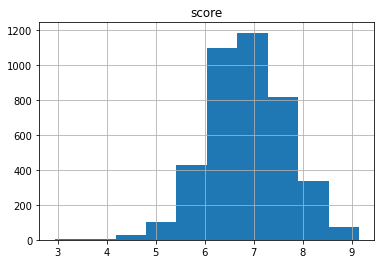

In [551]:
# Distribution of rating
score_rank.hist()

## Studio

In [552]:
# Count numbers of anime made by studios
studio_count = df.groupby(["studio"])["anime"].count().sort_values(ascending=False)
studio_count.head(20)

studio
Toei Animation          262
Sunrise                 178
Studio Deen             161
J.C.Staff               160
Madhouse                154
Nippon Animation        122
TMS Entertainment       114
Studio Pierrot          108
Tatsunoko Production    106
OLM                     103
A-1 Pictures             98
Production I.G           77
Gonzo                    73
Xebec                    72
DLE                      66
Bones                    61
Shin-Ei Animation        56
SILVER LINK.             56
Doga Kobo                55
Satelight                52
Name: anime, dtype: int64

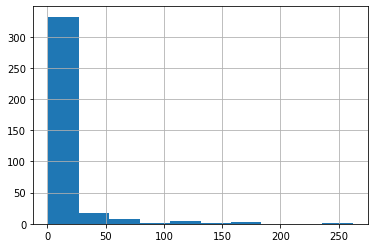

In [553]:
# Distribution of animes produced by studio
studio_count.hist()

## Ranking

In [554]:
# Some features has a "#" prefix; delete them
def delete_sharp(x):
  x = str(x)
  if x == "nan":
    return -1
  elif x[0] == "#":
    return int(x[1:])
  else:
    return x

In [555]:
# Clean ranking features and show highest rated animes. Null values not shown. (Some rank are missing because they are not TV shows)
df_clean["rank"] = df_clean["rank"].apply(delete_sharp).astype(int)
ranking = df_clean[["anime", "rank"]][df_clean["rank"] > 0].sort_values("rank")
ranking.head(20)

,anime,rank
2874,Fullmetal Alchemist: Brotherhood,1
4255,Gintama?,2
3121,Steins;Gate,3
3955,Shingeki no Kyojin Season 3 Part 2,4
1627,Shingeki no Kyojin: The Final Season Part 2,5
3710,Gintama',6
2967,Hunter x Hunter (2011),8
4581,Fruits Basket: The Final,9
1391,Gintama': Enchousen,10
4659,Gintama.,12


## Popularity

In [556]:
# Clean popularity features and show most popular animes. Null values not shown. (Some rank are missing because they are not TV shows)
df_clean["popularity"] = df_clean["popularity"].apply(delete_sharp).astype(int)
popularity = df_clean[["anime", "popularity"]][df_clean["popularity"] > 0].sort_values("popularity")
popularity.head(20)

,anime,popularity
1139,Shingeki no Kyojin,1
2210,Death Note,2
2874,Fullmetal Alchemist: Brotherhood,3
2405,One Punch Man,4
2973,Sword Art Online,5
1545,Boku no Hero Academia,6
3390,Tokyo Ghoul,7
220,Naruto,8
1823,Kimetsu no Yaiba,9
2967,Hunter x Hunter (2011),10


## Membership

In [557]:
# Some features have numbers seperated by comma (e.g., 1,234,500); delete them
def delete_comma(x):
  x = str(x)
  if x == "nan":
    return -1
  return int(x.replace(",", ""))

In [558]:
# Clean membership features and show animes with the most audience. Null values not shown.
df_clean["members"] = df_clean["members"].apply(delete_comma).astype(int)
membership = df_clean[["anime", "members"]][df_clean["members"] > 0].sort_values("members", ascending=False)
membership.head(20)

,anime,members
1139,Shingeki no Kyojin,3340909
2210,Death Note,3331576
2874,Fullmetal Alchemist: Brotherhood,2822351
2405,One Punch Man,2731807
2973,Sword Art Online,2701850
1545,Boku no Hero Academia,2570234
3390,Tokyo Ghoul,2436823
220,Naruto,2426258
1823,Kimetsu no Yaiba,2339213
2967,Hunter x Hunter (2011),2301610


## Seasons

In [559]:
# Count number of animes for each season and order them from most to least
season_count = df.groupby(["season"])["anime"].count().sort_values(ascending=False)
season_count.head(20)

season
Spring 2017    84
Fall 2016      80
Spring 2018    76
Spring 2016    75
Spring 2006    72
Spring 2014    72
Fall 2017      70
Spring 2011    70
Fall 2018      66
Fall 2015      65
Spring 2015    64
Summer 2016    63
Spring 2020    63
Spring 2021    62
Summer 2015    61
Winter 2021    61
Spring 2007    60
Spring 2013    59
Summer 2018    59
Summer 2017    59
Name: anime, dtype: int64

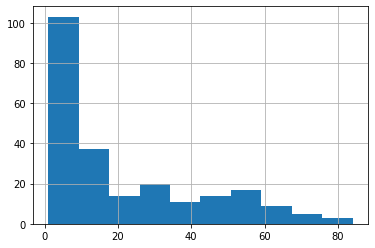

In [560]:
# Distribution of animes in a season
season_count.hist()

# Preprocess Data

## Into Time Series

In [561]:
# Only select relevant features
df_time = df_clean[["season", "anime", "score", "rank", "popularity", "members"]]
df_time.head()

,season,anime,score,rank,popularity,members
0,Spring 2004,Morizo to Kikkoro,NaN,12665,16458,205
1,Fall 2001,Hikaru no Go,8.08,461,1442,123926
2,Spring 2018,Caligula (TV),6.01,8722,2105,71817
3,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062
4,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255


In [562]:
# Drop null scores and null membership. (Will be used to calculate acclaim feature)
df_time = df_time.dropna(subset = ["score", "members"])
df_time.head()

,season,anime,score,rank,popularity,members
1,Fall 2001,Hikaru no Go,8.08,461,1442,123926
2,Spring 2018,Caligula (TV),6.01,8722,2105,71817
3,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062
4,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255
5,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262


In [563]:
# Order anime seasons from oldest (low) to newest (high). (1917 has the oldest anime listed in MyAnimeList)
def get_time(x):
  season, year = x.split(" ")[0], int(x.split(" ")[1])
  season_order = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
  return (year - 1917) * 4 + season_order[season]

In [564]:
# Check order of anime seasons
if ("time" not in df_time.columns):
  df_time.insert(0, "time", df["season"].apply(get_time))
df_time[["time", "season"]].head(10)

,time,season
1,339,Fall 2001
2,405,Spring 2018
3,369,Spring 2009
4,374,Summer 2010
5,201,Spring 1967
7,378,Summer 2011
8,373,Spring 2010
9,351,Fall 2004
10,349,Spring 2004
11,327,Fall 1998


In [565]:
# Shows number of anime in each season.
# For cross-checking with MyAnimeList to see if the scraped data is complete.
pd.set_option("display.max_rows", 1000)
check_group = df_time.groupby("time")
df_check = pd.DataFrame(data={"season": check_group["season"].first(), "count": check_group["anime"].count()})
print(df_check)
pd.reset_option("display.max_rows")

           season  count
time                    
177   Spring 1961      1
182   Summer 1962      1
184   Winter 1963      1
187     Fall 1963      3
188   Winter 1964      1
189   Spring 1964      1
190   Summer 1964      1
194   Summer 1965      3
195     Fall 1965      1
196   Winter 1966      1
197   Spring 1966      1
198   Summer 1966      1
199     Fall 1966      3
200   Winter 1967      2
201   Spring 1967      4
204   Winter 1968      1
205   Spring 1968      3
207     Fall 1968      3
208   Winter 1969      2
209   Spring 1969      3
211     Fall 1969      4
212   Winter 1970      1
213   Spring 1970      3
215     Fall 1970      3
216   Winter 1971      2
217   Spring 1971      2
219     Fall 1971      8
220   Winter 1972      3
221   Spring 1972      3
222   Summer 1972      1
223     Fall 1972      3
224   Winter 1973      4
225   Spring 1973      2
227     Fall 1973      8
228   Winter 1974      1
229   Spring 1974      6
231     Fall 1974      7
232   Winter 1975      3


## Calculate Acclaim

In [566]:
# Transform anime membership feature for analysis.
# The scale of anime membership should be logarithmic, because it will only take a few quality improvement for membership to become tenfold.
from math import log10
if ("members_log" not in df_time.columns):
  df_time.insert(7, "members_log", df_time["members"].apply(lambda x: log10(x)))
df_time.head()

,time,season,anime,score,rank,popularity,members,members_log
1,339,Fall 2001,Hikaru no Go,8.08,461,1442,123926,5.093162
2,405,Spring 2018,Caligula (TV),6.01,8722,2105,71817,4.856227
3,369,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062,4.148047
4,374,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255,4.645962
5,201,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262,3.629613


In [567]:
# Prepare to scale members feature. (The chosen training data for the scale to fit is in between 2000 and 2017, inclusive)
df_member_train = pd.DataFrame(data={"members": df_time[(df_time["time"] >= 332) & (df_time["time"] < 404)]["members_log"]})
print(df_member_train.head())
df_member_all = pd.DataFrame(data={"members": df_time["members_log"]})
print(df_member_all.head())

    members
1  5.093162
3  4.148047
4  4.645962
7  4.932174
8  4.766086
    members
1  5.093162
2  4.856227
3  4.148047
4  4.645962
5  3.629613


In [568]:
# Scale members so that it has the same scale as rating.
# The acclaim feature to be calculated has members and ratings factor.
# Scaling members is important so that the number of members do not overwhelm the rating.
# The training period is 2000-2017, the testing period is 2018-2019, the prediction period is 2020-2021.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 10))
scaler.fit(df_member_train)
df_time["members_scaled"] = scaler.transform(df_member_all)
df_time

,time,season,anime,score,rank,popularity,members,members_log,members_scaled
1,339,Fall 2001,Hikaru no Go,8.08,461,1442,123926,5.093162,6.493222
2,405,Spring 2018,Caligula (TV),6.01,8722,2105,71817,4.856227,5.912473
3,369,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062,4.148047,4.176661
4,374,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255,4.645962,5.397095
5,201,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262,3.629613,2.905934
...,...,...,...,...,...,...,...,...,...
5021,402,Summer 2017,Made in Abyss,8.68,52,95,1104027,6.042980,8.821308
5022,248,Winter 1979,Hana no Ko Lunlun,6.87,4392,7464,4663,3.668665,3.001654
5023,402,Summer 2017,Gamers!,6.81,4647,295,571452,5.756980,8.120297
5024,352,Winter 2005,Lime-iro Ryuukitan X,5.47,10737,7794,4147,3.617734,2.876816


In [569]:
# Calculate acclaim feature.
# The acclaim of an anime is defined to be the average rating of the anime multipled by the number of viewers.
# The acclaim will be high if many viewers view it and give it a high rating.
# A perfect rating with minimal viewers will not score as high, while a bad rating with lots of viewers will also not score as high.
# The members and ratings are both in the scale of 0-10, so they will contribute equally.
if ("acclaim" not in df_time.columns):
  df_time.insert(9, "acclaim", df_time["score"] * df_time["members_scaled"])
df_time

,time,season,anime,score,rank,popularity,members,members_log,members_scaled,acclaim
1,339,Fall 2001,Hikaru no Go,8.08,461,1442,123926,5.093162,6.493222,52.465234
2,405,Spring 2018,Caligula (TV),6.01,8722,2105,71817,4.856227,5.912473,35.533963
3,369,Spring 2009,Shin Mazinger Shougeki! Z-hen,7.67,1165,4785,14062,4.148047,4.176661,32.034987
4,374,Summer 2010,Digimon Xros Wars,6.68,5296,2765,44255,4.645962,5.397095,36.052595
5,201,Spring 1967,Ribbon no Kishi,6.71,5156,7710,4262,3.629613,2.905934,19.498816
...,...,...,...,...,...,...,...,...,...,...
5021,402,Summer 2017,Made in Abyss,8.68,52,95,1104027,6.042980,8.821308,76.568957
5022,248,Winter 1979,Hana no Ko Lunlun,6.87,4392,7464,4663,3.668665,3.001654,20.621361
5023,402,Summer 2017,Gamers!,6.81,4647,295,571452,5.756980,8.120297,55.299224
5024,352,Winter 2005,Lime-iro Ryuukitan X,5.47,10737,7794,4147,3.617734,2.876816,15.736185


In [570]:
# Check for seasons which have less than 5 animes.
# This check is for averaging the 5 highest acclaim level into a seasonal aggregate.
# Usually, anime seasons are defined by their top performing animes.
# This is because there are many animes with low production values that is not hyped.
# The acclaim level should not depend on how many low ranking animes there are in a season.
df_check[df_check["count"] < 5]

,season,count
time,,
177,Spring 1961,1
182,Summer 1962,1
184,Winter 1963,1
187,Fall 1963,3
188,Winter 1964,1
...,...,...
310,Summer 1994,3
314,Summer 1995,2
318,Summer 1996,3


In [571]:
# Create a single-variable time series data based on acclaim.
# The acclaim of a season is the average top 5 acclaims in the season.
groupby = df_time.sort_values("acclaim", ascending=False).groupby("time")
df_group = pd.DataFrame(data={"acclaim": groupby["acclaim"].agg(lambda x: x.head(5).mean())})
df_group.head(10)

,acclaim
time,
177,6.162302
182,4.748478
184,27.642904
187,11.145037
188,6.501784
189,7.947776
190,6.814573
194,6.349652
195,22.520990


In [572]:
# Smooth the time series with moving average of 20 periods.
# The members and ratings of an anime in MyAnimeList has some high peaks.
# This is due to the existence of top rated one-hit wonder animes that overall boost the season's acclaim.
# To smoothen this peak, moving average is used, and the value now represents an average acclaim for the past 5 years.
# Since the non-training data that will not be fit to the ARIMA model spans 4 years, this also lets moving average factor take place in non-training data.
series_smooth = df_group.loc[313:]["acclaim"]
df_smooth = pd.DataFrame(data={"acclaim": series_smooth.rolling(20).mean()})
df_smooth.head(25)

,acclaim
time,
313,NaN
314,NaN
315,NaN
316,NaN
317,NaN
318,NaN
319,NaN
320,NaN
321,NaN


## Exploring Time Series

In [573]:
# Seperate training data from 2000 to 2017, inclusive.
# The data will be divided into training, testing, and prediction data.
# The training data is for modelling.
# The testing data is for validating the model.
# Finally, the prediction data is used to compare with real data to see any deviations from the validated model.
df_train = df_smooth.loc[332:403]
df_train

,acclaim
time,
332,38.901473
333,38.898952
334,39.255926
335,39.957281
336,39.654689
...,...
399,68.566599
400,68.651534
401,68.657960


In [574]:
# Seperate testing data from 2018 to 2019, inclusive.
df_test = df_smooth.loc[404:411]
df_test

,acclaim
time,
404,69.434958
405,69.380459
406,69.698066
407,69.694482
408,70.262733
409,70.371374
410,70.308323
411,69.843463


In [575]:
# Seperate prediction data from 2020 to 2021, inclusive. (COVID-19 period)
df_predict = df_smooth.loc[412:419]

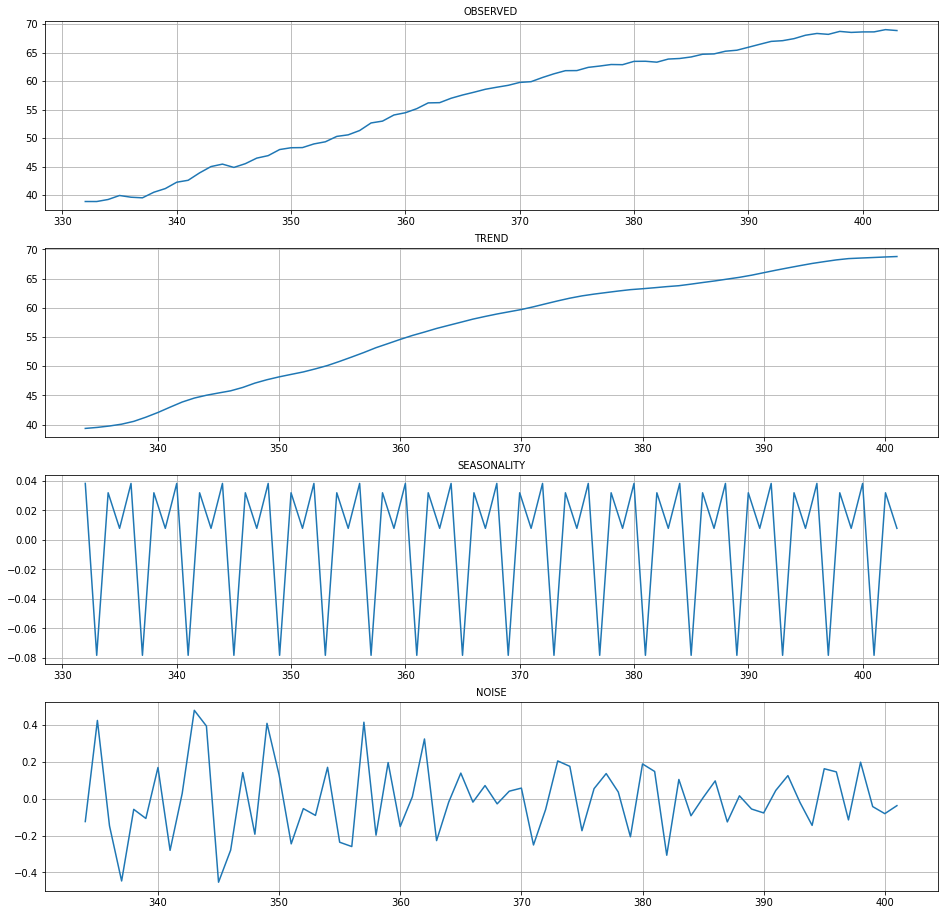

In [576]:
# Decompose time series for analysis
import statsmodels.api as sm
import matplotlib.pyplot as plt

res = sm.tsa.seasonal_decompose(df_train["acclaim"], period=4)
fig, axs = plt.subplots(4, figsize=(16,16))
axs[0].set_title("OBSERVED", fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title("TREND", fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title("SEASONALITY", fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title("NOISE", fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

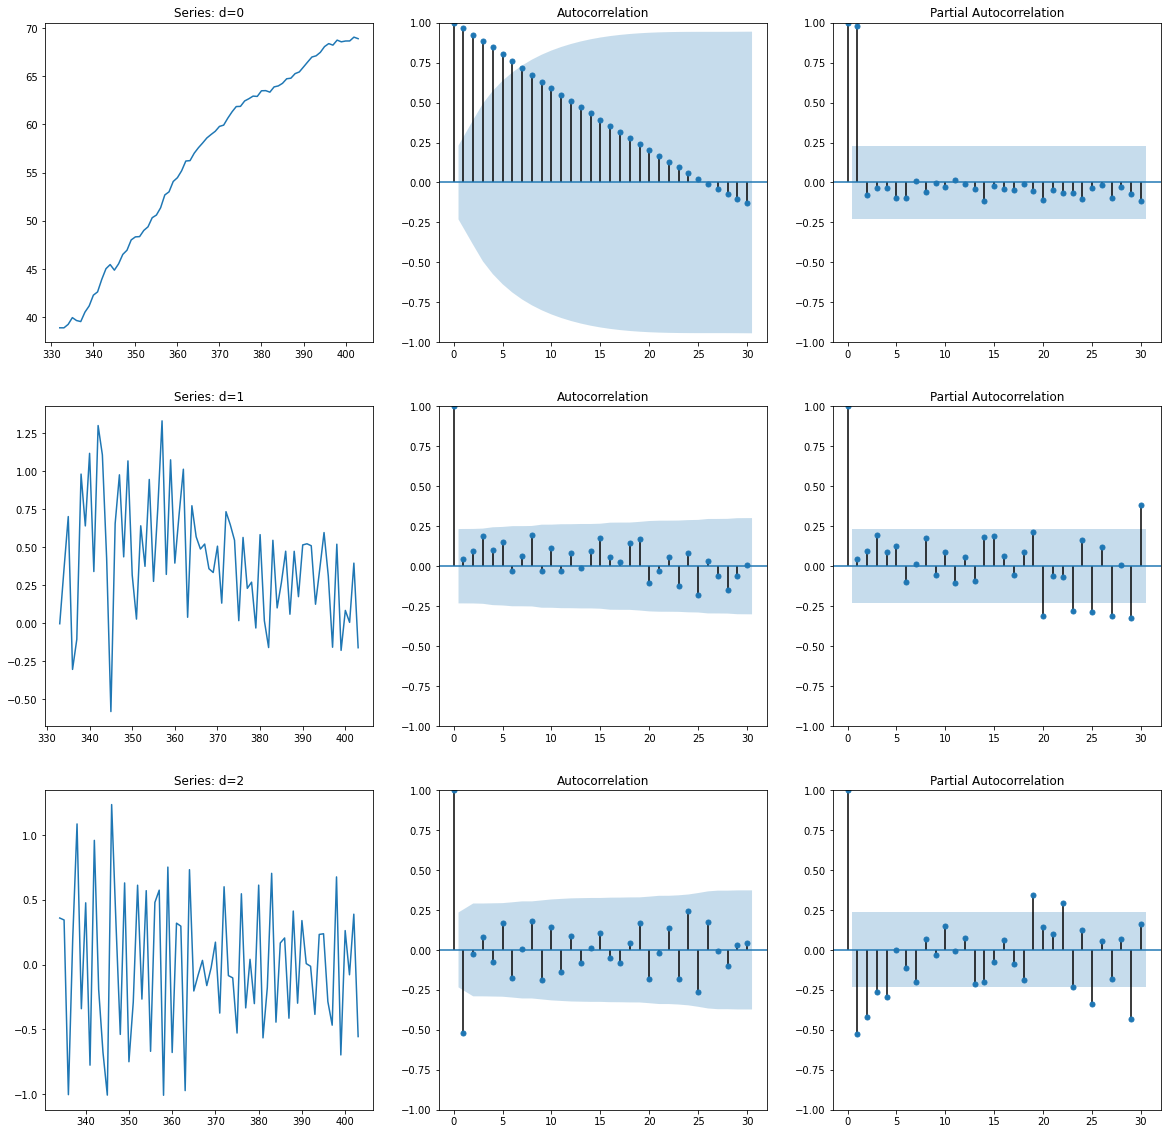

In [577]:
# Plot time series and their correlation functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes[0, 0].plot(df_train["acclaim"])
axes[0, 0].set_title("Series: d=0")
plot_acf(df_train["acclaim"], ax=axes[0, 1], lags=30)
plot_pacf(df_train["acclaim"], ax=axes[0, 2], lags=30)

# 1st Differencing
axes[1, 0].plot(df_train["acclaim"].diff())
axes[1, 0].set_title("Series: d=1")
plot_acf(df_train["acclaim"].diff().dropna(), ax=axes[1, 1], lags=30)
plot_pacf(df_train["acclaim"].diff().dropna(), ax=axes[1, 2], lags=30)

# 2nd Differencing
axes[2, 0].plot(df_train["acclaim"].diff().diff())
axes[2, 0].set_title("Series: d=2")
plot_acf(df_train["acclaim"].diff().diff().dropna(), ax=axes[2, 1], lags=30)
plot_pacf(df_train["acclaim"].diff().diff().dropna(), ax=axes[2, 2], lags=30)

plt.show()

# Model Data

## Model Creation

In [578]:
# Fit ARIMA(4,1,4).
# From the plotted data, d=0 is not stationary and has an increasing trend.
# d=2's ACF plot is too negative for q=1 due to over-differencing.
# d=1 is chosen, and their corresponding p and q is 4 and 4, from PACF and ACF, respectively.
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train["acclaim"],order=(4,1,4))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                acclaim   No. Observations:                   72
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 -30.929
Date:                Sat, 02 Apr 2022   AIC                             79.859
Time:                        10:57:28   BIC                            100.223
Sample:                             0   HQIC                            87.957
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2692      8.594      0.031      0.975     -16.575      17.113
ar.L2          1.4351      6.272      0.229      0.819     -10.858      13.728
ar.L3          0.2858      6.054      0.047      0.962     -11.579      12.151
ar.L4         -0.9901      8.500     -0.116      0.907     -17.650      15.670
ma.L1         -0.1415     14.069     -0.010      0.992     -27.717      27.434
ma.L2         -1.3467     11.686     -0.115      0.908     -24.251      21.558
ma.L3         -0.3728      7.669     -0.049      0.961     -15.405      14.659
ma.L4          0.8615     11.771      0.073      0.942     -22.208      23.931
sigma2         0.1309      0.737      0.178      0.859      -1.314       1.576
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.16
Prob(Q):                              0.96   Prob(JB):                         0.21
Heteroskedasticity (H):               0.26   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

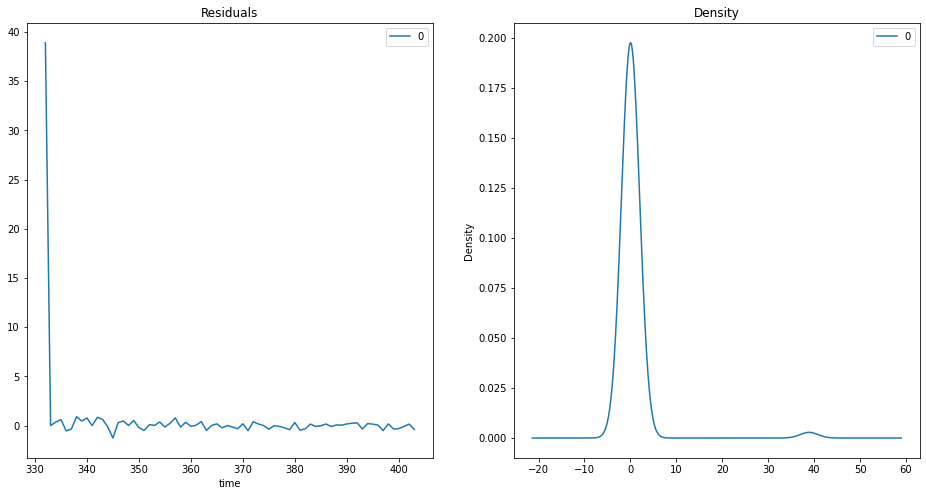

In [579]:
# Plot residual errors.
# To ensure that all trends and seasonality are captured in the model, residuals are inspected.
# The first residual is due to first-order differencing.
# There seems to be no pattern within the residual.
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Training Data

In [580]:
# Predict acclaim. The fist value is zero due to differencing.
df_train["acclaim_pred"] = result.predict()
df_train.head(10)

,acclaim,acclaim_pred
time,,
332,38.901473,0.000000
333,38.898952,38.901477
334,39.255926,38.897823
335,39.957281,39.352416
336,39.654689,40.192787
337,39.549368,39.891814
338,40.529762,39.622712
339,41.169679,40.702804
340,42.286383,41.513858


In [581]:
# Measure model training performance. MAPE is less than 5%, but testing performance must also be checked.
from sklearn import metrics

acclaim_actual = df_train["acclaim"].loc[333:]
acclaim_pred = df_train["acclaim_pred"].loc[333:]

print('(MAE) Mean Absolute Error is:\n', metrics.mean_absolute_error(acclaim_actual, acclaim_pred), '\n')
print('(MSE) Mean Squared Error is:\n', metrics.mean_squared_error(acclaim_actual, acclaim_pred), '\n')
print('(MAPE) Mean Absolute Percentage Error is:\n', metrics.mean_absolute_percentage_error(acclaim_actual, acclaim_pred), '\n')
print('(R^2) Coefficient of Determination is:\n', metrics.r2_score(acclaim_actual, acclaim_pred), '\n')

(MAE) Mean Absolute Error is:
 0.28681274159333336 

(MSE) Mean Squared Error is:
 0.14208091434366185 

(MAPE) Mean Absolute Percentage Error is:
 0.005556706753347085 

(R^2) Coefficient of Determination is:
 0.9984231765464355 



## Testing Data

In [582]:
# Predict acclaim for years 2018 and 2019
df_test_result = pd.DataFrame(data={"acclaim": df_test["acclaim"].values.tolist(), "acclaim_pred": result.predict(start=72, end=79).tolist()})
df_test_result

,acclaim,acclaim_pred
0,69.434958,68.965879
1,69.380459,69.250933
2,69.698066,69.259903
3,69.694482,69.523990
4,70.262733,69.617662
5,70.371374,69.742183
6,70.308323,69.976719
7,69.843463,69.983840


In [583]:
# Measure model training performance. MAPE is less than 5%, so the model is totally acceptable.
from sklearn import metrics

acclaim_test_actual = df_test_result["acclaim"]
acclaim_test_pred = df_test_result["acclaim_pred"]

print('(MAE) Mean Absolute Error is:\n', metrics.mean_absolute_error(acclaim_test_actual, acclaim_test_pred), '\n')
print('(MSE) Mean Squared Error is:\n', metrics.mean_squared_error(acclaim_test_actual, acclaim_test_pred), '\n')
print('(MAPE) Mean Absolute Percentage Error is:\n', metrics.mean_absolute_percentage_error(acclaim_test_actual, acclaim_test_pred), '\n')
print('(R^2) Coefficient of Determination is:\n', metrics.r2_score(acclaim_test_actual, acclaim_test_pred), '\n')

(MAE) Mean Absolute Error is:
 0.36918768971133 

(MSE) Mean Squared Error is:
 0.17494124616672357 

(MAPE) Mean Absolute Percentage Error is:
 0.005275444207516815 

(R^2) Coefficient of Determination is:
 -0.28682631269414127 



## Prediction Data

In [584]:
# Predict acclaim for years 2020 and 2021
df_predict_result = pd.DataFrame(data={"acclaim": df_predict["acclaim"].values.tolist(), "acclaim_pred": result.predict(start=80, end=87).tolist()})
df_predict_result

,acclaim,acclaim_pred
0,69.422611,70.265168
1,69.067783,70.294853
2,69.035625,70.476383
3,68.749925,70.641196
4,68.854969,70.676003
5,68.642053,70.944375
6,68.125653,70.933932
7,67.999590,71.163014


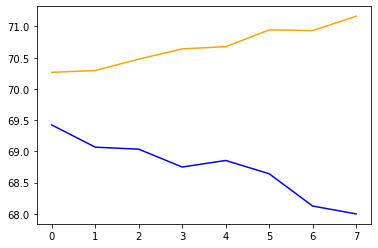

In [585]:
# Plot actual acclaim against the predicted values.
# Performance is not measured here since the model is already validated during testing prediction.
acclaim_predict_actual = df_predict_result["acclaim"]
acclaim_predict_pred = df_predict_result["acclaim_pred"]

acclaim_predict_actual.plot(color="blue")
acclaim_predict_pred.plot(color="orange")
plt.show()

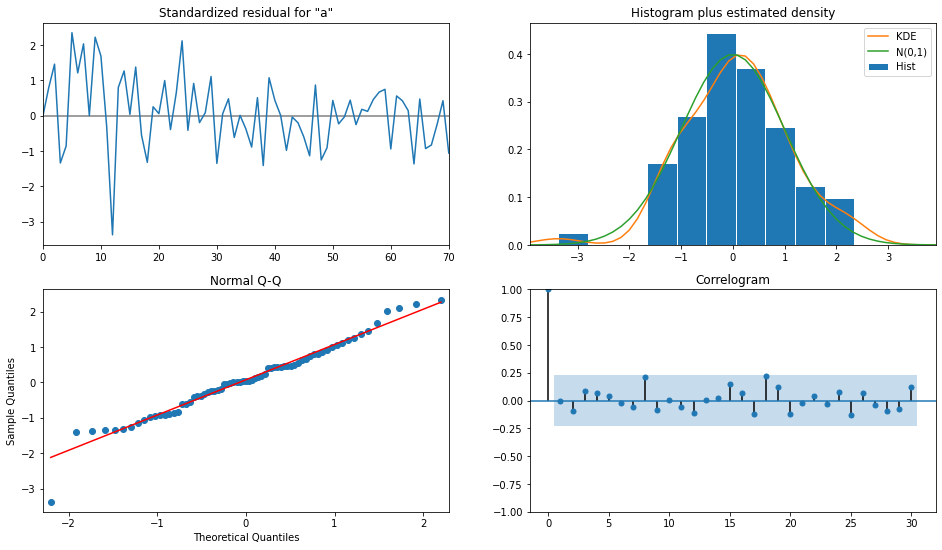

In [586]:
# Model diagnostics
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

In [587]:
# Full prediction result (2000-2021)
df_full = df_smooth.loc[333:419]
df_full_result = pd.DataFrame(data={"acclaim": df_full["acclaim"].values.tolist(), "acclaim_pred": result.predict(start=1, end=87).tolist()})
df_full_result.tail(16)

,acclaim,acclaim_pred
71,69.434958,68.965879
72,69.380459,69.250933
73,69.698066,69.259903
74,69.694482,69.523990
75,70.262733,69.617662
76,70.371374,69.742183
77,70.308323,69.976719
78,69.843463,69.983840
79,69.422611,70.265168
80,69.067783,70.294853


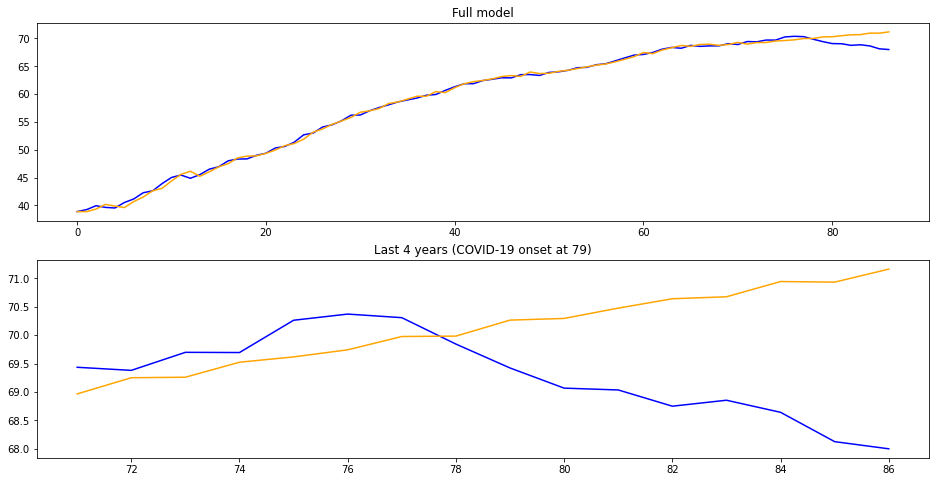

In [588]:
# Plot actual and predicted acclaim values
fig, axes = plt.subplots(2, figsize=(16, 8))

df_full_result["acclaim"].plot(color="blue", ax=axes[0], title="Full model")
df_full_result["acclaim_pred"].plot(color="orange", ax=axes[0])

df_full_result["acclaim"].loc[71:86].plot(color="blue", ax=axes[1], title="Last 4 years (COVID-19 onset at 79)")
df_full_result["acclaim_pred"].loc[71:86].plot(color="orange", ax=axes[1])

plt.show()

From model performance metric, the model is acceptable.

Yet, it does not predict a dip in acclaim after the onset of COVID-19.

Therefore, we can say that the COVID-19 pandemic is correlated to the decrase in anime popularity.

One of the reasons why this could happen is due to the loss in production values.

Since the anime sales fell, we may expect the quality to also fall.

This could result in loss of rating and thus, loss of acclaim.

Another reason is that the new animes have not gained enough audience.

Even though the COVID-19 pandemic could have allowed more people watch more anime, the new seasonal animes have not obtained as much viewership as the old classics.

However, this may not be as likely since there are many famous animes like Jujutsu Kaisen and Attack on Titan that garnered over a million of audience.

### So, my conclusion is that the loss of sales since 2020 due to COVID-19 have affected the anime quality, and thus also for their rating and viewership.





# References

MyAnimeList: https://myanimelist.net/anime/season/archive

Web Scraper: https://webscraper.io/

ARIMA model reference: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Anime sales drop: https://www.japantimes.co.jp/news/2021/08/15/business/anime-industry-sales/